In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
debt_df=pd.read_csv('tot_debt - Sheet1 (1).csv')

In [ ]:
debt_df.head()

,Year,For_Borrowing,Dom_Borrowing,Tot_Debt
0,1990,11644,13508,25152
1,1991,19329,16149,35478
2,1992,7361,15551,22912
3,1993,9855,24241,34096
4,1994,11778,37696,49474


In [ ]:
debt_df.tail()

,Year,For_Borrowing,Dom_Borrowing,Tot_Debt
27,2017,439243,294251,733494
28,2018,323535,437234,760769
29,2019,542641,896448,1439089
30,2020,83199,1750887,1834086
31,2021,13901,2071826,2085727


In [ ]:
debt_df.dtypes

Year             int64
For_Borrowing    int64
Dom_Borrowing    int64
Tot_Debt         int64
dtype: object

In [ ]:
debt_df.isna().sum()

Year             0
For_Borrowing    0
Dom_Borrowing    0
Tot_Debt         0
dtype: int64

In [ ]:
debt_df=debt_df[['Year','Tot_Debt']]

In [ ]:
debt_df['Year'] = pd.to_datetime(debt_df['Year'], format='%Y')


 Buidling ARIMA Model

In [ ]:
debt_df.set_index('Year', inplace=True)

Stationary test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(time_series):
    # Calculate rolling statistics
    rolling_mean = time_series.rolling(window=12).mean()
    rolling_std = time_series.rolling(window=12).std()

    # Plot original data, rolling mean, and rolling standard deviation
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    result = adfuller(time_series, autolag='AIC')
    print("Augmented Dickey-Fuller Test Results:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Interpretation
    if result[1] <= 0.05:
        print("p-value <= 0.05: Strong evidence against null hypothesis (Non-Stationary)")
    else:
        print("p-value > 0.05: Weak evidence against null hypothesis (Stationary)")

    if result[0] < result[4]['5%']:
        print("ADF Statistic < 5% Critical Value: Strong evidence for stationarity")
    else:
        print("ADF Statistic >= 5% Critical Value: Weak evidence against stationarity")




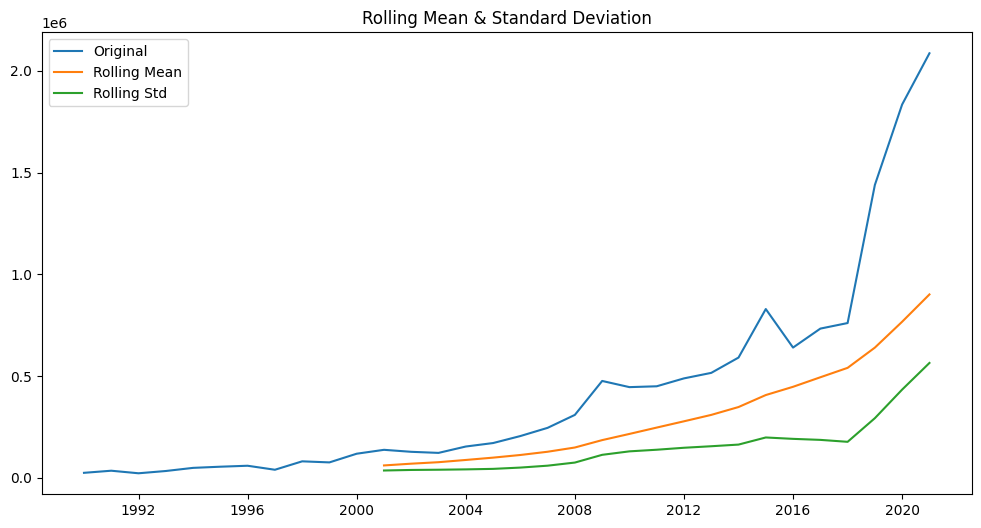

Augmented Dickey-Fuller Test Results:
ADF Statistic: 3.89109356737685
p-value: 1.0
Critical Values:
   1%: -3.7883858816542486
   5%: -3.013097747543462
   10%: -2.6463967573696143
p-value > 0.05: Weak evidence against null hypothesis (Stationary)
ADF Statistic >= 5% Critical Value: Weak evidence against stationarity


In [ ]:
# Assuming 'debt_df' is your DataFrame
debt_df['Tot_Debt'] = pd.to_numeric(debt_df['Tot_Debt'], errors='coerce')  # Convert to numeric if not already

# Call the function
test_stationarity(debt_df['Tot_Debt'])

Stationarizing the Data

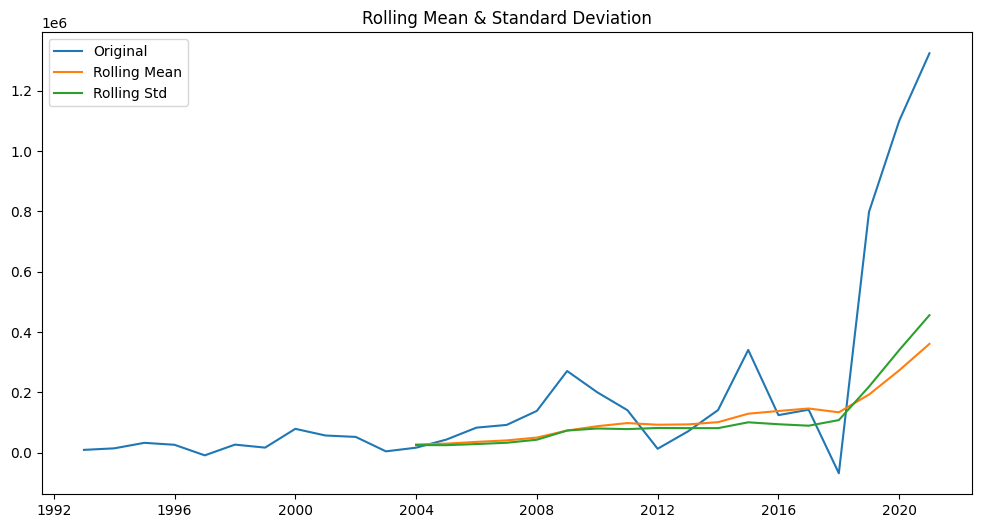

Augmented Dickey-Fuller Test Results:
ADF Statistic: 1.4859738985386144
p-value: 0.9974717575702349
Critical Values:
   1%: -3.8326031418574136
   5%: -3.0312271701414204
   10%: -2.655519584487535
p-value > 0.05: Weak evidence against null hypothesis (Stationary)
ADF Statistic >= 5% Critical Value: Weak evidence against stationarity


In [ ]:
debt_df['tot_debt_diff'] = debt_df['Tot_Debt'] - debt_df['Tot_Debt'].shift(3)
debt_df.dropna(inplace=True)

test_stationarity(debt_df['tot_debt_diff'])


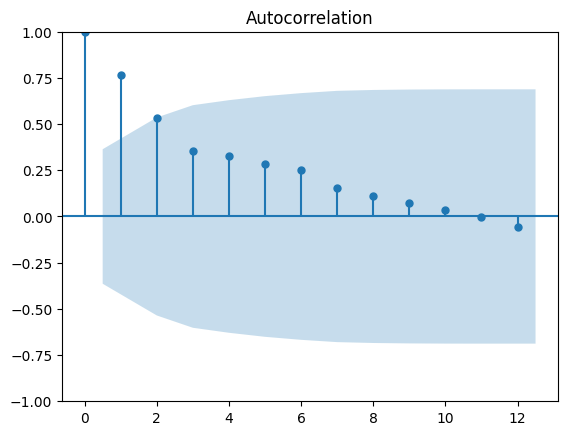

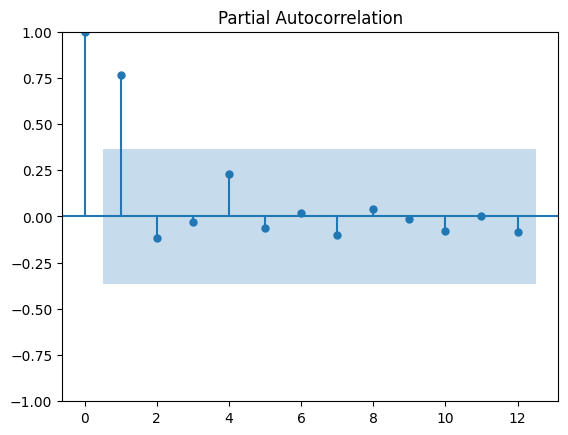

In [ ]:
plot_acf(debt_df['Tot_Debt'], lags=12)
plot_pacf(debt_df['Tot_Debt'], lags=12)
plt.show()


ARIMA


In [ ]:
p = 2
d =3
q = 3

# Build and train the ARIMA model
model = ARIMA(debt_df['Tot_Debt'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Tot_Debt   No. Observations:                   29
Model:                 ARIMA(2, 3, 3)   Log Likelihood                -352.787
Date:                Sun, 03 Sep 2023   AIC                            717.575
Time:                        09:43:40   BIC                            725.123
Sample:                    01-01-1993   HQIC                           719.749
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6634      7.230     -0.092      0.927     -14.835      13.508
ar.L2          0.2233      2.789      0.080      0.936      -5.243       5.690
ma.L1         -0.9160      7.766     -0.118      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Predict

In [ ]:
forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

print("Forecasted values:", forecast)


Forecasted values: 2022-01-01    2.355780e+06
2023-01-01    2.765307e+06
2024-01-01    3.145675e+06
2025-01-01    3.635792e+06
2026-01-01    4.105847e+06
2027-01-01    4.672977e+06
2028-01-01    5.230484e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


Visualize

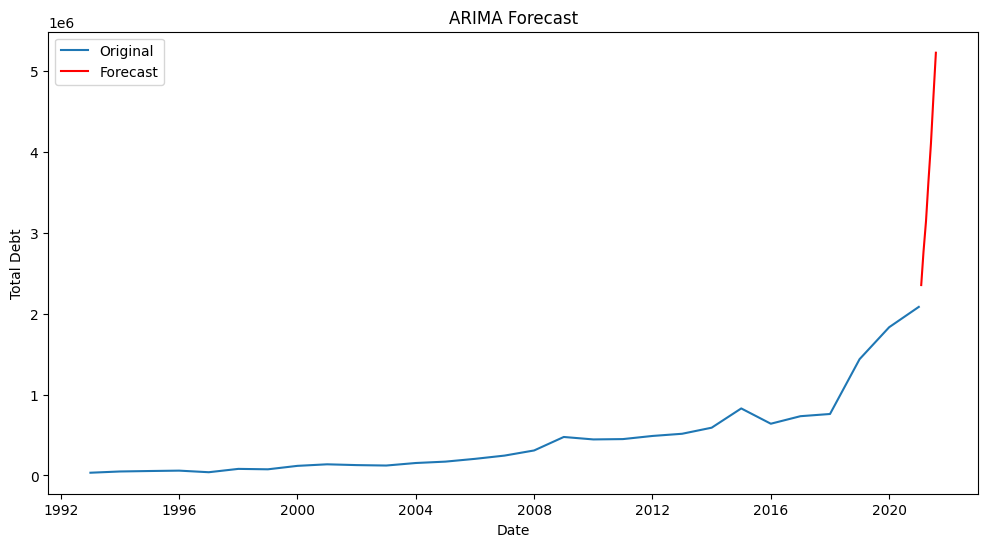

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(debt_df.index, debt_df['Tot_Debt'], label='Original')
plt.plot(pd.date_range(start=debt_df.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', color='r')



plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Debt')
plt.show()


In [ ]:

# Parameters
p = 2
d = 3
q = 3

# Seasonal parameters (for yearly data, there is no seasonality)
P = 0
D = 0
Q = 0
s = 12

# Build and train the SARIMAX model
model = SARIMAX(debt_df['Tot_Debt'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Tot_Debt   No. Observations:                   29
Model:               SARIMAX(2, 3, 3)   Log Likelihood                -352.787
Date:                Sun, 03 Sep 2023   AIC                            717.575
Time:                        09:43:41   BIC                            725.123
Sample:                    01-01-1993   HQIC                           719.749
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6634      7.230     -0.092      0.927     -14.835      13.508
ar.L2          0.2233      2.789      0.080      0.936      -5.243       5.690
ma.L1         -0.9160      7.766     -0.118      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


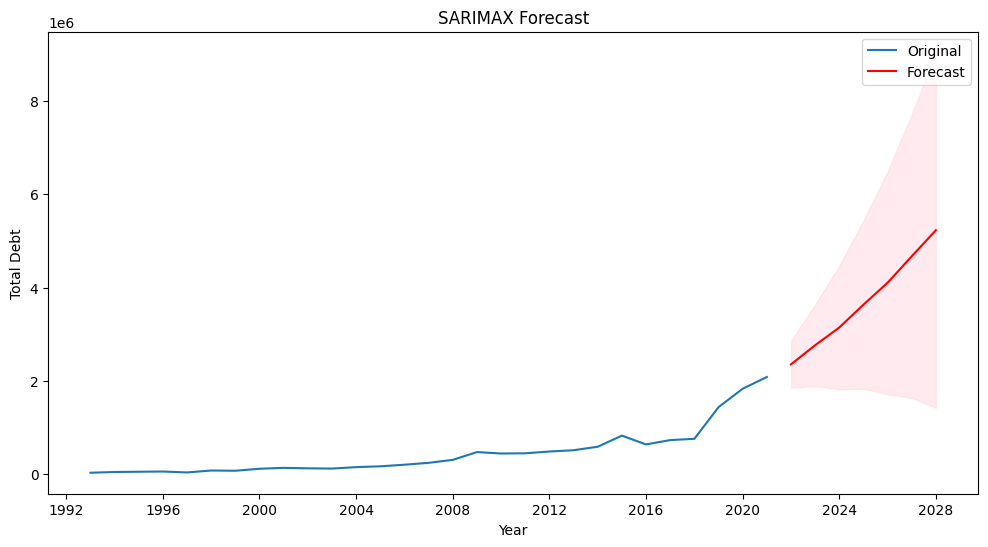

In [ ]:
# Forecast the future values
forecast_steps = 7
forecast = model_fit.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(debt_df.index, debt_df['Tot_Debt'], label='Original')
plt.plot(pd.date_range(start=debt_df.index[-1], periods=forecast_steps, freq='Y'), forecasted_values, label='Forecast', color='r')

# Fill between confidence intervals
plt.fill_between(pd.date_range(start=debt_df.index[-1], periods=forecast_steps, freq='Y'),
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.legend()
plt.title('SARIMAX Forecast')
plt.xlabel('Year')
plt.ylabel('Total Debt')
plt.show()

In [ ]:
forecasted_values[7]

2022-01-01    2.355780e+06
2023-01-01    2.765307e+06
2024-01-01    3.145675e+06
2025-01-01    3.635792e+06
2026-01-01    4.105847e+06
2027-01-01    4.672977e+06
2028-01-01    5.230484e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
forecasted_values[6]

5230484.074509773

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Tot_Debt   No. Observations:                   29
Model:               SARIMAX(2, 3, 3)   Log Likelihood                -352.787
Date:                Sun, 03 Sep 2023   AIC                            717.575
Time:                        09:46:48   BIC                            725.123
Sample:                    01-01-1993   HQIC                           719.749
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6634      7.230     -0.092      0.927     -14.835      13.508
ar.L2          0.2233      2.789      0.080      0.936      -5.243       5.690
ma.L1         -0.9160      7.766     -0.118      0.906     -16.136      14.304
ma.L2         -0.5515     11.221     -0.049      0.961     -22.545      21.442
ma.L3          0.5860      4.954      0.118      0.906      -9.123      10.295
sigma2      6.561e+10   1.63e-10   4.04e+20      0.000    6.56e+10    6.56e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                51.08
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              83.42   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.13e+37. Standard errors may be unstable.
"""

In [ ]:
import pickle


# Assuming 'model' is your trained machine learning model
with open('tot_debt_model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)


In [ ]:
with open('tot_debt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


forecast_steps = 7
forecast = loaded_model.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
tot_gov_debt=forecasted_values[forecast_steps-1]
tot_gov_debt

5230484.074509773